In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#Imported the movie datset in csv format
df = pd.read_csv("movie_dataset.csv")
df

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
5,5,258000000,Fantasy Action Adventure,http://www.sonypictures.com/movies/spider-man3/,559,dual identity amnesia sandstorm love of one's ...,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,...,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,Tobey Maguire Kirsten Dunst James Franco Thoma...,"[{'name': 'Francine Maisler', 'gender': 1, 'de...",Sam Raimi
6,6,260000000,Animation Family,http://disney.go.com/disneypictures/tangled/,38757,hostage magic horse fairy tale musical,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,...,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,Zachary Levi Mandy Moore Donna Murphy Ron Perl...,"[{'name': 'John Lasseter', 'gender': 2, 'depar...",Byron Howard
7,7,280000000,Action Adventure Science Fiction,http://marvel.com/movies/movie/193/avengers_ag...,99861,marvel comic sequel superhero based on comic b...,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,...,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,Robert Downey Jr. Chris Hemsworth Mark Ruffalo...,"[{'name': 'Danny Elfman', 'gender': 2, 'depart...",Joss Whedon
8,8,250000000,Adventure Fantasy Family,http://harrypotter.warnerbros.com/harrypottera...,767,witch magic broom

In [3]:
#Query1: What are the top 5 movies similar to the input movie. 
#The similiarity of the movies are determined by the keywords, cast, genre and director. Hence, they are chosen as the features.
features = ['keywords','cast','genres','director']

In [4]:
#The features are combined to make a new column named combine_feature.
def combine_features(row):
    return row['keywords']+" "+row['cast']+" "+row['genres']+" "+row['director']

In [5]:
#filling all NaNs with blank string
for feature in features:
    df[feature] = df[feature].fillna('') 

#applying combined_features() method over each rows of dataframe and storing the combined string in "combined_features" column
df["combined_features"] = df.apply(combine_features,axis=1)

In [6]:
#displaying first element of the combined column combine_feature
df.iloc[0].combined_features

'culture clash future space war space colony society Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez Action Adventure Fantasy Science Fiction James Cameron'

In [7]:
#converting the combine_feature string into vector form so that comparison can be done using cosine similarity.
cv = CountVectorizer() #creating new CountVectorizer() object
count_matrix = cv.fit_transform(df["combined_features"]) #feeding combined strings(movie contents) to CountVectorizer() object

In [8]:
#cosine similarity is defined for the input matrix.
cosine_sim = cosine_similarity(count_matrix)
cosine_sim

array([[1.        , 0.10540926, 0.12038585, ..., 0.        , 0.        ,
        0.        ],
       [0.10540926, 1.        , 0.0761387 , ..., 0.03651484, 0.        ,
        0.        ],
       [0.12038585, 0.0761387 , 1.        , ..., 0.        , 0.11145564,
        0.        ],
       ...,
       [0.        , 0.03651484, 0.        , ..., 1.        , 0.        ,
        0.04264014],
       [0.        , 0.        , 0.11145564, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04264014, 0.        ,
        1.        ]])

In [9]:
#for obtaining title from index and vice versa
def index_title(index):
    return df[df.index == index]["title"].values[0]
def title_index(title):
    return df[df.title == title]["index"].values[0]

In [10]:
#User Input
movie_user_likes = "The Avengers"
movie_index = title_index(movie_user_likes)

In [11]:
#accessing the row corresponding to given movie to find all the similarity scores for that movie and then enumerating over it
similar_movies = list(enumerate(cosine_sim[movie_index]))
#similar_movies

In [12]:
#sorting of all the similarity index in descending order.
sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]
#sorted_similar_movies

In [13]:
#for dispalying the top 5 similar movies in the sorted list of similar movies.
i=0
print("Top 5 similar movies to "+movie_user_likes+" are:\n")
for element in sorted_similar_movies:
    print(index_title(element[0]),"(Movie Index-",element[0],", Similarity Index-", element[1],")")
    i=i+1
    if i>5:
        break

Top 5 similar movies to The Avengers are:

Avengers: Age of Ultron (Movie Index- 7 , Similarity Index- 0.9181561700975335 )
Iron Man 2 (Movie Index- 79 , Similarity Index- 0.6109598099719177 )
Captain America: The Winter Soldier (Movie Index- 85 , Similarity Index- 0.5743796858006127 )
Captain America: Civil War (Movie Index- 26 , Similarity Index- 0.5430753866417045 )
Thor: The Dark World (Movie Index- 126 , Similarity Index- 0.47519096331149147 )
The Incredible Hulk (Movie Index- 174 , Similarity Index- 0.4689790496105418 )


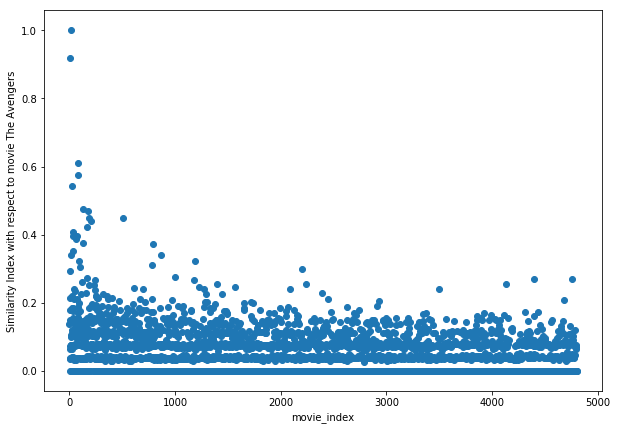

In [14]:
#Plotting of Similarity Index of every movie with respect to movie The Avengers inclusing itself 
plt.figure(figsize=(10, 7))
plt.scatter(df["index"], cosine_sim[movie_index])

plt.xlabel('movie_index')
plt.ylabel("Similarity Index with respect to movie The Avengers")
plt.show()

In [15]:
#Query2: Which are the top 5 movies profitable movies. What are the profit, revenue, budget and director name for such movies?
#The profit is decided by revenue and budget. Hence, the same features are considered under name finance.
finance = ['budget','revenue']

In [16]:
#Profit is calculated and a new column named profit is created
def profit(row):
    return row['revenue']-row['budget']

In [17]:
#filling all NaNs with blank string
for finance in finance:
    df[finance] = df[finance].fillna('') 

#applying profit() method over each rows of dataframe and storing the profit values in "profit" column
df["profit"] = df.apply(profit,axis=1)

In [18]:
#Displaying the first row of the profit column
df.iloc[0].profit

2550965087

In [19]:
#Obtaining revenue, budget and director name from the movie index
def index_revenue(index):
    return df[df.index == index]["revenue"].values[0]
def index_budget(index):
    return df[df.index == index]["budget"].values[0]
def index_director(index):
    return df[df.index == index]["director"].values[0]

In [20]:
#accessing the row corresponding to given movie to find the profit for that movie and then enumerating over it
prof = list(enumerate(df['profit']))

In [21]:
#Sorting the profits in descending order
s_prof = sorted(prof,key=lambda x:x[1],reverse=True)[0:]

In [22]:
#Displaying the results.
i=0
print("Top 5 profit making movies are (The financial values are in US Dollars)")
for element in s_prof:
    print(index_title(element[0]),"--(Movie Index-",element[0], ",Profit-", element[1],
          ",Budget-",index_budget(element[0]),",Revenue-",index_revenue(element[0]),
          ",Director-",index_director(element[0]),")")
    i=i+1
    if i>5:
        break

Top 5 profit making movies are (The financial values are in US Dollars)
Avatar --(Movie Index- 0 ,Profit- 2550965087 ,Budget- 237000000 ,Revenue- 2787965087 ,Director- James Cameron )
Titanic --(Movie Index- 25 ,Profit- 1645034188 ,Budget- 200000000 ,Revenue- 1845034188 ,Director- James Cameron )
Jurassic World --(Movie Index- 28 ,Profit- 1363528810 ,Budget- 150000000 ,Revenue- 1513528810 ,Director- Colin Trevorrow )
Furious 7 --(Movie Index- 44 ,Profit- 1316249360 ,Budget- 190000000 ,Revenue- 1506249360 ,Director- James Wan )
The Avengers --(Movie Index- 16 ,Profit- 1299557910 ,Budget- 220000000 ,Revenue- 1519557910 ,Director- Joss Whedon )
Avengers: Age of Ultron --(Movie Index- 7 ,Profit- 1125403694 ,Budget- 280000000 ,Revenue- 1405403694 ,Director- Joss Whedon )


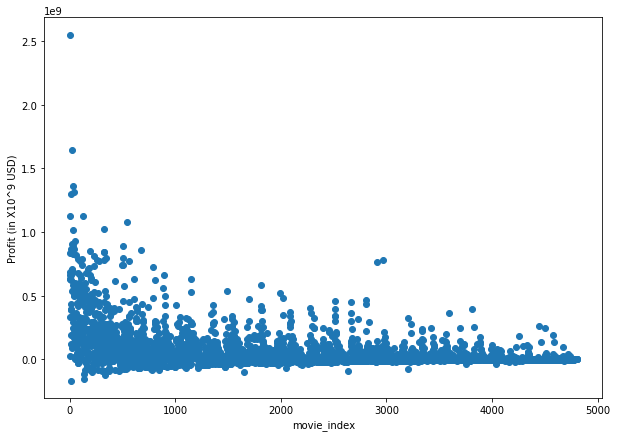

In [23]:
#Comparison of Profits of all the movies with the help of Plot between Profit and the movie Index
plt.figure(figsize=(10, 7))
plt.scatter(df['index'], df['profit'])
plt.xlabel('movie_index')
plt.ylabel('Profit (in X10^9 USD)')
plt.show()

In [24]:
#Query 3: Displaying the top 5 movies having the highest rating and the rating values
#accessing the values in vote_average column to corresponding to each row.
vote_avg = list(enumerate(df['vote_average']))
#vote_avg 

In [25]:
#Sorting the rating in descending order
sorted_vote_avg = sorted(vote_avg,key=lambda x:x[1],reverse=True)[0:]
#sorted_vote_avg

In [26]:
#Displaying the top 5 movies having the highest rating
i=0
print("Top 5 movies having the highest ratings are:-")
for element in sorted_vote_avg:
    print(index_title(element[0]), "Vote_average-", element[1])
    i=i+1
    if i>5:
        break

Top 5 movies having the highest ratings are:-
Stiff Upper Lips Vote_average- 10.0
Dancer, Texas Pop. 81 Vote_average- 10.0
Me You and Five Bucks Vote_average- 10.0
Little Big Top Vote_average- 10.0
Sardaarji Vote_average- 9.5
One Man's Hero Vote_average- 9.3


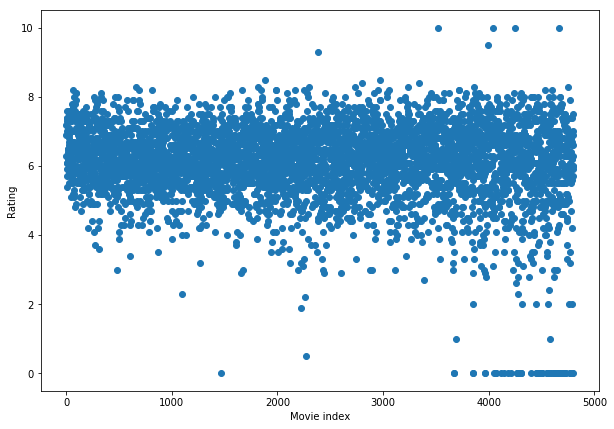

In [27]:
#Comparison of ratings value of various movies obtained by Average Vote Count using Plot between Rating and Movie Index
plt.figure(figsize=(10, 7))
plt.scatter(df['index'], df['vote_average'])
plt.xlabel('Movie index')
plt.ylabel('Rating')
plt.show()

In [28]:
#Query 4: Displaying the top 5 movies having the highest popularity.
#accessing the values in popularity column corresponding to each row.
pop = list(enumerate(df['popularity']))
#pop

In [29]:
#Sorting the popularity in descending order
sorted_pop = sorted(pop,key=lambda x:x[1],reverse=True)[1:]
#sorted_pop

In [30]:
#Displaying the top 5 movies having highest popularity
i=0
print("Top 5 Popular movie and their popularity are\n ")
for element in sorted_pop:
    print(index_title(element[0]))
    i=i+1
    if i>5:
        break

Top 5 Popular movie and their popularity are
 
Interstellar
Deadpool
Guardians of the Galaxy
Mad Max: Fury Road
Jurassic World
Pirates of the Caribbean: The Curse of the Black Pearl


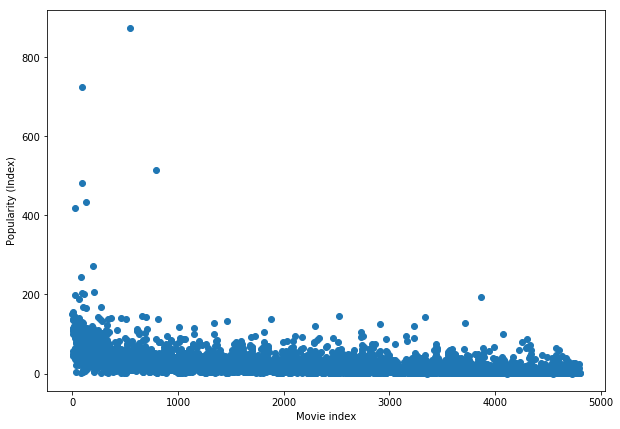

In [31]:
#Comparison of Popularities of various movies using Plot between Popularity values and Movie Index.
plt.figure(figsize=(10, 7))
plt.scatter(df['index'], df['popularity'])
plt.xlabel('Movie index')
plt.ylabel('Popularity (Index)')
plt.show()